In [1]:
!pip install ucimlrepo
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from ucimlrepo import fetch_ucirepo


In [3]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

In [5]:
# Dividir los datos en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Escalar los datos
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [7]:
# Modelo de Regresión (KNN)
regressor = KNeighborsRegressor(n_neighbors=10,weights="distance",metric="minkowski",p=2)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

In [8]:

# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)
mape = (abs((y_test_reg - y_pred_reg) / y_test_reg)).mean() * 100  # Evita si hay valores cercanos a 0
correlation = np.corrcoef(y_test_reg.values.ravel(), y_pred_reg.ravel())[0, 1]

# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}%")
print(f"Regresión - Correlación de Pearson: {correlation}")

Regresión - MAE: 0.4026627003384012
Regresión - MSE: 0.37707273738152297
Regresión - RMSE: 0.6140624865447514
Regresión - R²: 0.4894395789470015
Regresión - MedAE: 0.2719304798910436
Regresión - MAPE: quality    7.297013
dtype: float64%
Regresión - Correlación de Pearson: 0.7013877910453442


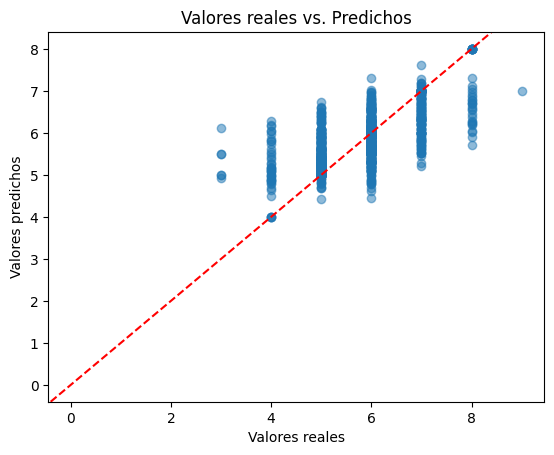

In [9]:
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Predichos")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Línea ideal
plt.show()

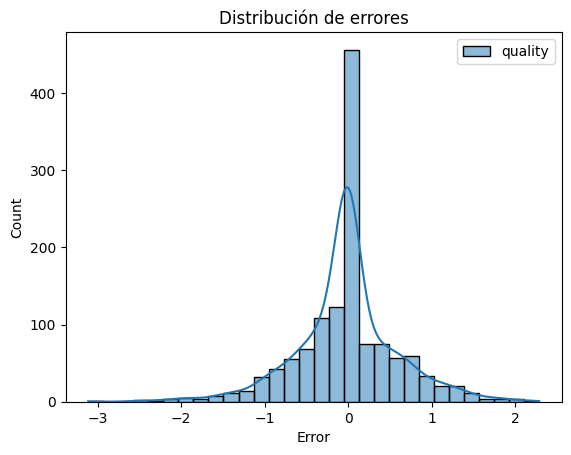

In [10]:
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()


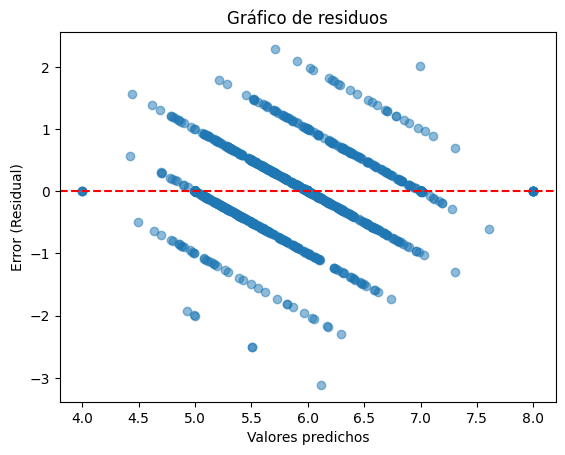

In [11]:
plt.scatter(y_pred_reg, errors, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Error (Residual)")
plt.title("Gráfico de residuos")
plt.show()